In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Метод Монте-Карло
Интегрируем, разбрасывая точки (x, y) случайным образом n раз в прямоугольнике (x0, x1) X (y0, y1). Если f(x) > y, точка (x, y) лежит под графиком / внутри кривой.

In [2]:
def mc_integrate(f, x, y, n):
    x0, x1 = x
    y0, y1 = y
    xs = np.random.rand(n) * (x1 - x0) + x0
    ys = np.random.rand(n) * (y1 - y0) + y0
    inside = f(xs, ys)
    m = sum(inside)
    s = (m / n) * (y1 - y0) * (x1 - x0)    
    return s, xs, ys, inside

In [3]:
def test(f, x, y, n):
    s, xs, ys, inside = mc_integrate(f, x, y, n)
    outside = ~inside

    plt.figure(figsize=(6, 6))
    plt.plot(xs[inside], ys[inside], 'k.')
    plt.plot(xs[outside], ys[outside], 'm.')

    print(f'result: {s:.3f}')

### Синус, 100 точек

result: 2.300


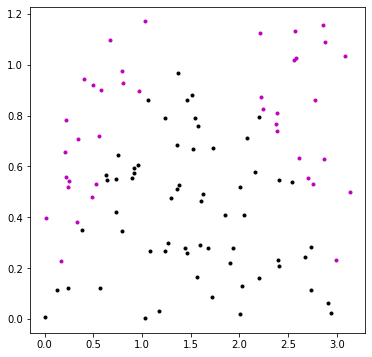

In [4]:
sin = lambda x, y : (np.sin(x) - y) >= 0
x, y = (0, np.pi), (0, 1.2)
n = 100
test(sin, x, y, n)

### Синус, 10000 точек

result: 2.009


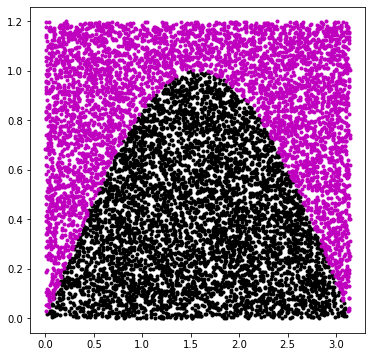

In [5]:
sin = lambda x, y : (np.sin(x) - y) >= 0
x, y = (0, np.pi), (0, 1.2)
n = 10000
test(sin, x, y, n)

### Круг, 100 точек

result: 3.398


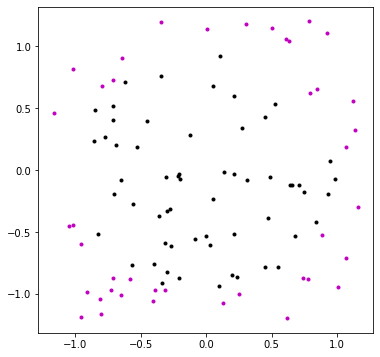

In [6]:
circ = lambda x, y : 1 - (x**2 + y**2) >= 0
x, y = (-1.2, 1.2), (-1.2, 1.2)
n = 100
test(circ, x, y, n)

### Круг, 10000 точек

result: 3.118


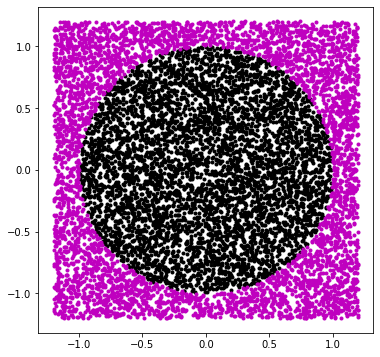

In [7]:
circ = lambda x, y : 1 - (x**2 + y**2) >= 0
x, y = (-1.2, 1.2), (-1.2, 1.2)
n = 10000
test(circ, x, y, n)